# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waajid
Processing Record 2 of Set 1 | aykhal
Processing Record 3 of Set 1 | garachico
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | shangmei
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | tevragh zeina
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | kamaishi
Processing Record 13 of Set 1 | nova vicosa
Processing Record 14 of Set 1 | saryozek
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | mount pearl
Processing Record 20 of Set 1 | siwa oasis
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waajid,3.8096,43.2463,31.78,39,88,9.67,SO,1690027114
1,aykhal,66.0000,111.5000,24.87,41,87,6.39,RU,1690027114
2,garachico,28.7781,-17.7646,24.06,61,20,9.77,ES,1690027114
3,badger,64.8000,-147.5333,15.93,85,0,2.57,US,1690027114
4,naze,28.3667,129.4833,27.51,85,100,3.82,JP,1690027115


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waajid,3.8096,43.2463,31.78,39,88,9.67,SO,1690027114
1,aykhal,66.0000,111.5000,24.87,41,87,6.39,RU,1690027114
2,garachico,28.7781,-17.7646,24.06,61,20,9.77,ES,1690027114
3,badger,64.8000,-147.5333,15.93,85,0,2.57,US,1690027114
4,naze,28.3667,129.4833,27.51,85,100,3.82,JP,1690027115


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

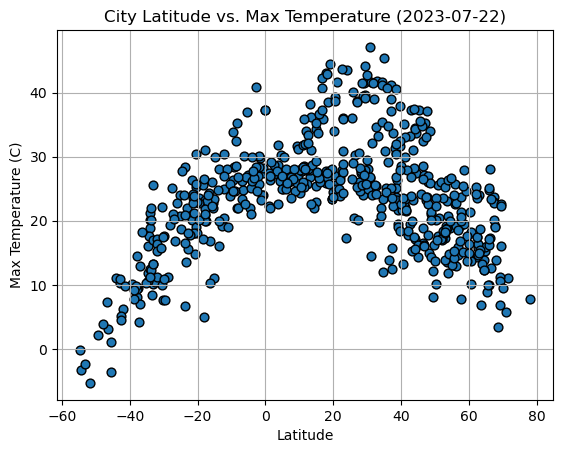

In [8]:
# Build scatter plot for latitude vs. temperature
ax = city_data_df.plot.scatter("Lat", "Max Temp", grid=True, s=40, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
ax.set_title(f"City Latitude vs. Max Temperature ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

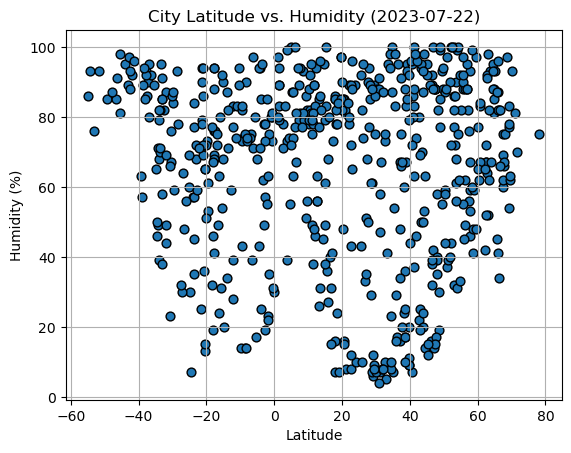

In [9]:
# Build the scatter plots for latitude vs. humidity
ax = city_data_df.plot.scatter("Lat", "Humidity", grid=True, s=40, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs. Humidity ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

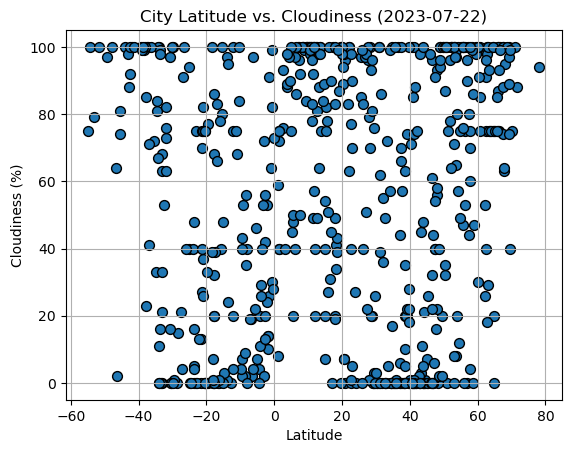

In [10]:
# Build the scatter plots for latitude vs. cloudiness
ax = city_data_df.plot.scatter("Lat", "Cloudiness", grid=True, s=50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs. Cloudiness ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

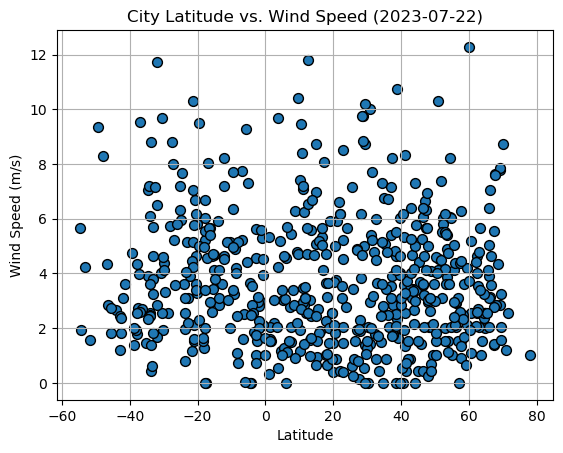

In [11]:
# Build the scatter plots for latitude vs. wind speed
ax = city_data_df.plot.scatter("Lat", "Wind Speed", grid=True, s=50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"City Latitude vs. Wind Speed ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress_plot(df, x, y):
    # Linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])

    regress_values = slope*df[x] + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plots using light markers so equation is more readable if over some data points
    ax = df.plot.scatter(x, y, color="#7FAEEC", s=30)
    plt.plot(df[x], regress_values, "r-")

    # Add labels
    ax.set_xlabel("Latitude")
    ax.set_ylabel(y)
    # programatically define where the equation is printed based on the data being plotted
    ax.annotate(line_eq,(df[x].min()+5,df[y].max()-5),fontsize=15,color="red")

    plt.show()
    # Return the regression coefficient statement through the function return
    return(f"The r-value is: {rvalue}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waajid,3.8096,43.2463,31.78,39,88,9.67,SO,1690027114
1,aykhal,66.0000,111.5000,24.87,41,87,6.39,RU,1690027114
2,garachico,28.7781,-17.7646,24.06,61,20,9.77,ES,1690027114
3,badger,64.8000,-147.5333,15.93,85,0,2.57,US,1690027114
4,naze,28.3667,129.4833,27.51,85,100,3.82,JP,1690027115


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,waitangi,-43.9535,-176.5597,11.01,95,100,2.68,NZ,1690027115
8,grytviken,-54.2811,-36.5092,-3.33,93,100,1.93,GS,1690027115
9,puerto natales,-51.7236,-72.4875,-5.31,93,100,1.57,CL,1690027115
11,nova vicosa,-17.8919,-39.3719,22.96,76,32,5.21,BR,1690027074
14,port-aux-francais,-49.3500,70.2167,2.15,85,97,9.37,TF,1690027116


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5472682472119328


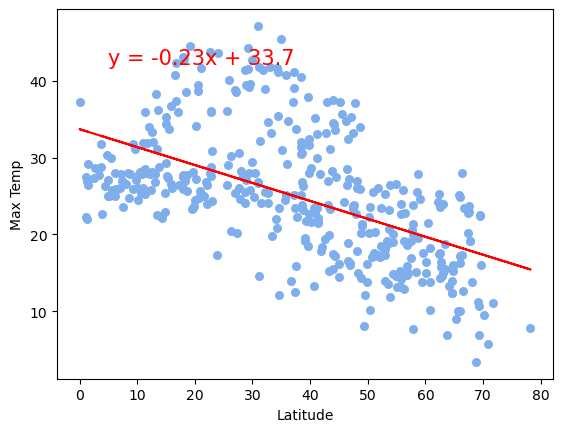

-0.5472682472119328

In [15]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Max Temp"

lin_regress_plot(df, x, y)

The r-value is: 0.8273721168857822


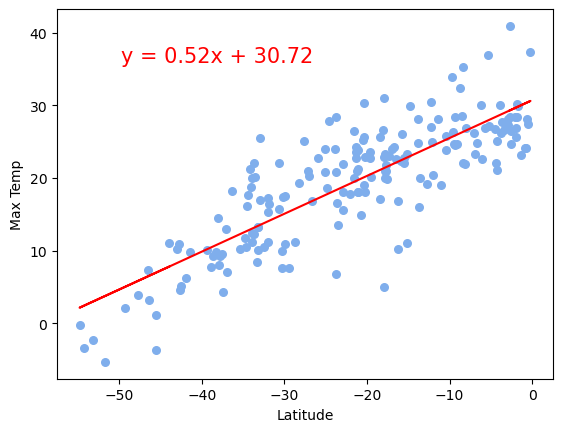

0.8273721168857822

In [16]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Max Temp"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** The data shows a positive relationship between latitude and maximum temperature in the southern hemisphere and a negative raltionship in the northern hemisphere. In other words, the maximum temperature tends to be higher closer to the equator. Generally, the relationship is stronger in the southern hemisphere than in northern hemisphere.

Supporting Notes: The data pull on 7/20/2023 shows a strong relationship in the southern hemisphere (0.865) than in the northern hemisphere (-0.643). The data pull on 7/21/2023 shows a strong relationship in the southern hemisphere (0.827) than in the northern hemisphere (-0.641). The data pull on 7/22/2023 shows a strong relationship in the southern hemisphere (0.827) than in the northern hemisphere (-0.547). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01707250745224662


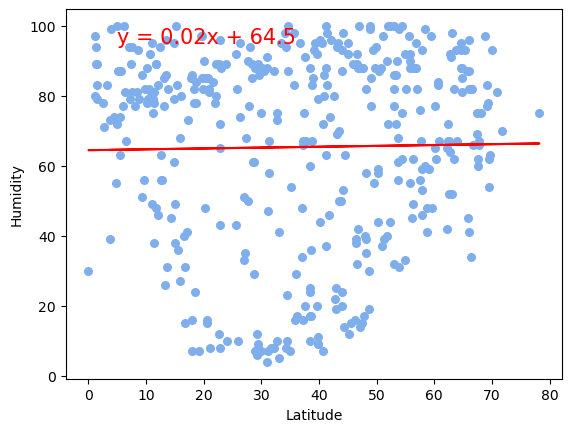

0.01707250745224662

In [17]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Humidity"

lin_regress_plot(df, x, y)

The r-value is: -0.2915879308619188


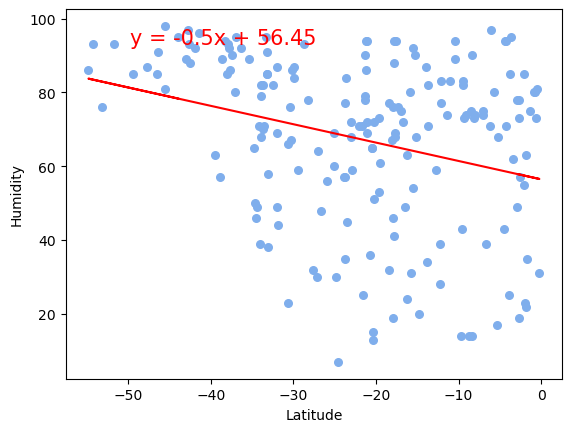

-0.2915879308619188

In [18]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Humidity"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Humidity is independent of latititude. Some days, the sample shows a weak correlation but the absolute value of the coefficient has remained below 0.4.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.01413077513712332


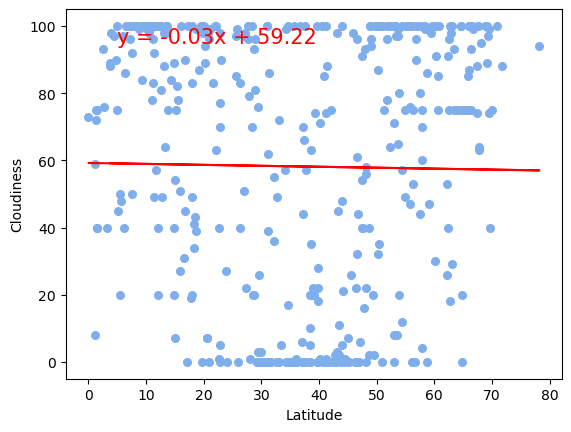

-0.01413077513712332

In [19]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Cloudiness"

lin_regress_plot(df, x, y)

The r-value is: -0.3749178098041846


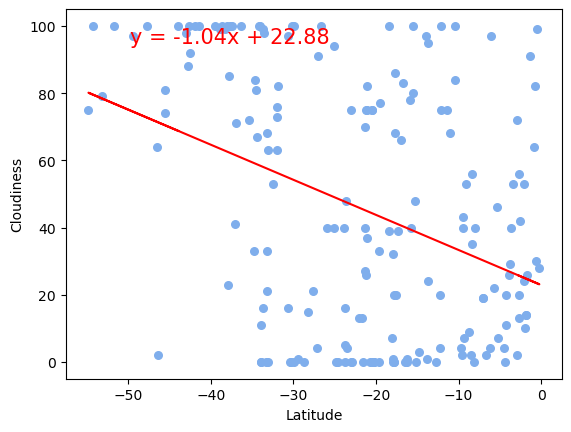

-0.3749178098041846

In [20]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Cloudiness"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Cloudiness is independent of latititude. Some days, the sample shows a weak correlation but the absolute value of the coefficient has remained below 0.4.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011183821110755967


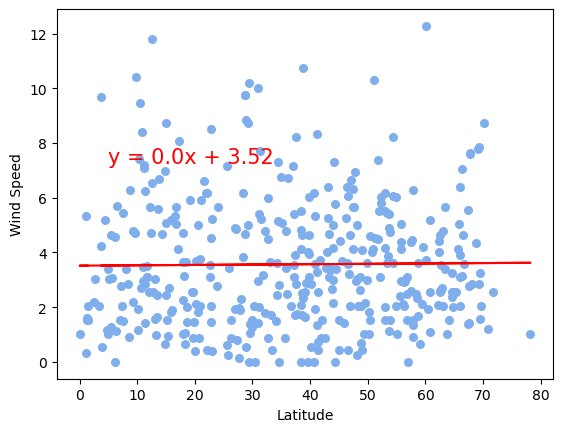

0.011183821110755967

In [21]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Wind Speed"

lin_regress_plot(df, x, y)

The r-value is: -0.0487925735129887


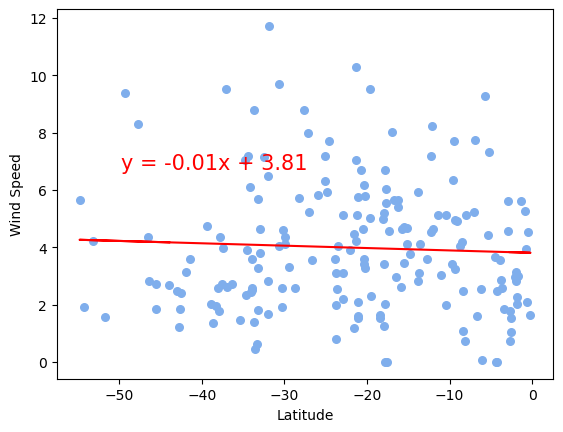

-0.0487925735129887

In [22]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Wind Speed"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Wind Speed is independent of latititude. Often samples show this as weaker (coefficient closest to zero) than humidity and cloudiness but not always.